#  Relaxation Time - Permeability -- Dependecy Analysis

```{figure} BCC.png
---
scale: 50%
align: right
---
Periodic body-centered cubic (BCC): a) 3D image b) 2D projection.
```

In the present analysis, we aim to observe the relationship between the relaxation time of the collision model ($\tau$) and the intrinsic permeability ($k). It should be noted that this relationship is directly influenced by the collision model and the boundary conditions employed in the model. The problem of creeping flow over a periodic body-centered cubic (BCC) is explored in orde to compare the present results with Pan et al. (2006). The permeabilidade of a periodic array spheres is given by

$k^{*}=\displaystyle\frac{1}{6\pi a d^{*}}$

where $a$ is the sphere radius and $d^{*}$ is dimensionless drag force represented by

$d^{*}=\displaystyle\frac{6\pi a \rho \nu }{F_{D}}$

being $\rho$ the fluid density, $\nu$ the kinematic viscosity, $F_{D}$ the drag force. The dimensionless drag force can be also determined by the geometric propertie of solid volume fraction $c$ as a expansion function given by

$d^{*}=\displaystyle\sum_{n=0}^{30}\alpha_{n}\chi^{n}, \quad\quad \chi=\left(\displaystyle\frac{c}{c_{max}}\right)^{1/3}, \quad\quad c=\displaystyle\frac{8\pi a^{3}}{3L^{3}}, \quad\quad c_{\max}=\displaystyle\frac{\sqrt{3}\pi}{8},$

where $L$ is the length of the cube, $\chi$ the relation between the solid volume and maximum solid volume and $\alpha_{n}$ the coefficients obtained by Sangani and Acrivos (1982)(https://doi.org/10.1016/0301-9322(82)90047-7). The permeability in the dimensional form corresponds to  $k=k^{*}(2a)^{2}$. 

## BCC Analytical Permeability 

Below is calculated with above equations the permeability for the case of $\chi\approx 0.85$ in a domain fo $L=32$ and $a=0,3678125$.

In [13]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='matplotlib')
import numpy as np
import matplotlib.pyplot as plt

#Coefficients up to the order 25
alpha_s = np.array([1.0,1.575834,2.483254,3.233022,4.022864,4.650320,5.281412,5.826374,6.258376,6.544504,6.878396,
               7.190839,7.268068,7.304025,7.301217,7.2364410,7.298014,7.369847,7.109497,6.228418,5.235796,
              4.476874,3.541982,2.939353,3.935484])
a=11.77/32.0 #Dimensionless Ratio
a0=11.77 #Dimensional Ratio
chi=( (64.0*a**(3.))/(np.sqrt(3.0)*3.0*(1.0)**(3.0)) )**(1./3.) #Ratio between solid volume and max volume of solid
#-------------Dimensionless Drag Force Calculation-----------------------------
d=0.0
for i in range (0,len(alpha_s)):
    d=d+alpha_s[i]*chi**(i)
#-------------------------------------------------------------------------------
ks=1.0/(d*6.0*np.pi*a) #Dimensionless Permeability
print("--------------------------------------------------------------------------------")
print("d=",d, "        Dimensionless Drag Force")
print("k=",ks, "     Dimensionless Permeability")
print("chi=",chi, "     Ratio between solid volume and max volume of solid")
print("--------------------------------------------------------------------------------")

--------------------------------------------------------------------------------
d= 25.36122502210341         Dimensionless Drag Force
K= 0.005687247978039972      Dimensionless Permeability
chi= 0.8494265835452369      Ratio between solid volume and max volume of solid
--------------------------------------------------------------------------------


## BCC Numerical Permeability 

### Generating the Domain

The 3D discrete domain is generate by the below python code with $32^{3}$ points of discretization and considering all periodic boundaries:

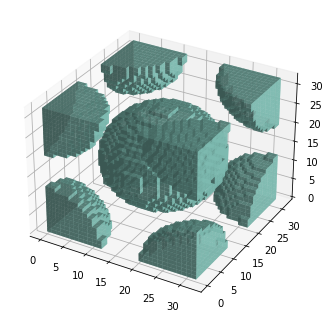

In [15]:
import numpy as np
import matplotlib.pylab as plt
cx = 32
cy = 32
cz = 32
Rr=11.77
D=np.ones((cx,cy,cz),dtype="uint8")*1
for i in range(0,cx):
    for j in range (0, cy):
        for k in range (0,cz):
            dist = np.sqrt((i+0.5-cx/2)*(i+0.5-cx/2) + (j+0.5-cy/2)*(j+0.5-cy/2) + (k+0.5-cz/2)*(k+0.5-cz/2))
            if (dist < Rr) :
                D[i,j,k] = 0
            dist = np.sqrt((i+0.5-cx)*(i+0.5-cx) + (j+0.5)*(j+0.5) + (k+0.5)*(k+0.5))
            if (dist < Rr) :
                D[i,j,k] = 0
            dist = np.sqrt((i+0.5)*(i+0.5) + (j+0.5-cy)*(j+0.5-cy) + (k+0.5)*(k+0.5))
            if (dist < Rr) :
                D[i,j,k] = 0
            dist = np.sqrt((i+0.5)*(i+0.5) + (j+0.5)*(j+0.5) + (k+0.5-cz)*(k+0.5-cz))
            if (dist < Rr) :
                D[i,j,k] = 0
            dist = np.sqrt((i+0.5)*(i+0.5) + (j+0.5)*(j+0.5) + (k+0.5)*(k+0.5))
            if (dist < Rr) :
                D[i,j,k] = 0
            dist = np.sqrt((i+0.5)*(i+0.5) + (j+0.5-cy)*(j+0.5-cy) + (k+0.5-cz)*(k+0.5-cz))
            if (dist < Rr) :
                D[i,j,k] = 0
            dist = np.sqrt((i+0.5-cx)*(i+0.5-cx) + (j+0.5)*(j+0.5) + (k+0.5-cz)*(k+0.5-cz))
            if (dist < Rr) :
                D[i,j,k] = 0
            dist = np.sqrt((i+0.5-cx)*(i+0.5-cx) + (j+0.5-cy)*(j+0.5-cy) + (k+0.5)*(k+0.5))
            if (dist < Rr) :
                D[i,j,k] = 0
            dist = np.sqrt((i+0.5-cx)*(i+0.5-cx) + (j+0.5-cy)*(j+0.5-cy) + (k+0.5-cz)*(k+0.5-cz))
            if (dist < Rr) :
                D[i,j,k] = 0

D.tofile("BBC-%d.raw"% (cx)) # Array save in a file .raw 
X = np.linspace(0.0, float(cx), cx+1) 
Y = np.linspace(0.0, float(cy), cy+1) 
Z = np.linspace(0.0, float(cz), cz+1) 
X, Y, Z = np.meshgrid(Z,Y,X)
#--------------3D Plot of the Domai-----------------------------
import matplotlib.pyplot as plt
import numpy as  np
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(121,projection='3d')
data = np.random.normal(0,1,[X.shape[0]-1,X.shape[1]-1,X.shape[2]-1])
data = D
colors = plt.cm.Set3(data)
ax1.voxels(X, Y, Z, D-1,facecolors=colors, alpha=0.8)
ax1.grid(False)
plt.show()

### Plotting Resuls

The present results are plotted in the bellow graphic and compared with the results of Pan et al. (2006).

**Figure** - The normalized permeability $k/k^{*}$ for the BCC array of spheres vs. the kinematic viscosity $\nu$. The resolution is $32^{3}$ and $\chi=0.85$. The * indicate the results of Pan et al. (2006).

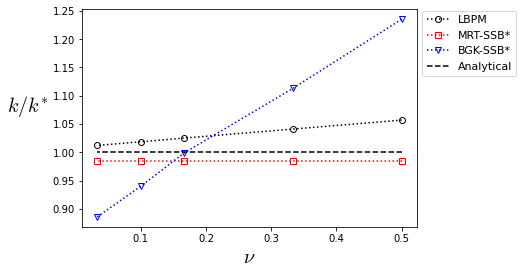

'\n# Title\n\nMore markdown\n'

In [36]:
import numpy as np
import matplotlib.pylab as plt
matplotlib.rcParams['mathtext.fontset'] = 'cm'
#----------------------------------------------------------
nu = np.array([1./2., 1./3., 1./6., 1./10., 1./30.]) #Kinematic Viscosity Values
k = np.array([3.331, 3.281, 3.231, 3.210, 3.19]) #Present results
kPMSSB = np.array([0.984,0.984,0.984,0.984,0.984]) #MRT-SSB
kPBSSB = np.array([1.235,1.113,0.999,0.940,0.886]) #BGK-SSB
#------------------Plots--------------------------------------
plt.plot(nu,(k/(a0*4.0*a0))/ks,'ko:',fillstyle='none')
plt.plot(nu,kPMSSB,'r:s',fillstyle='none')
plt.plot(nu,kPBSSB,'b:v',fillstyle='none')
plt.plot(nu,k*0+1,'k--',fillstyle='none')
plt.ylabel('$k/k^{*}$', color='k', horizontalalignment='right',rotation=0, fontsize=20)
plt.xlabel('$\\nu$', fontsize=20)
plt.legend(['LBPM','MRT-SSB*','BGK-SSB*','Analytical'],fontsize=11.,bbox_to_anchor=(1.0, 1.02))
plt.show()